In [1]:
from astropy.table import Table
import numpy as np

from matplotlib import pyplot as plt

import galprime

In [2]:
table = Table.read('../pdata/HSC-ZEST_CLEAN.fits')
print(len(table), table.colnames)


t_trimmed = galprime.trim_table(table, r50_key="R_GIM2D",  n_key="SERSIC_N_GIM2D", ellip_key="ELL_GIM2D", 
                       bin_keys=["Z_BEST", "MASS_MED", "sfProb"])


30718 ['ID', 'FUV', 'NUV', 'u', 'uS', 'g', 'r', 'i', 'z', 'y', 'err_FUV', 'err_NUV', 'err_u', 'err_uS', 'err_g', 'err_r', 'err_i', 'err_z', 'err_y', 'Z_BEST', 'Z_BEST68_LOW', 'Z_BEST68_HIGH', 'RA_1', 'DEC_1', 'MU_MAX_u', 'MU_MAX_uS', 'MU_MAX_g', 'MU_MAX_r', 'MU_MAX_i', 'MU_MAX_z', 'PATCH', 'TRACT', 'ZPHOT', 'MASS_MED', 'MASS_INF', 'MASS_SUP', 'AGE_MED', 'SFR_MED', 'SSFR_MED', 'CLASS', 'SequentialID', 'RA_ZEST', 'DEC_ZEST', 'CAPAK_ID', 'CAPAK_RA', 'CAPAK_DEC', 'ACS_MAG_AUTO', 'ACS_MAGERR_AUTO', 'ACS_X_IMAGE', 'ACS_Y_IMAGE', 'ACS_XPEAK_IMAGE', 'ACS_YPEAK_IMAGE', 'ACS_ALPHAPEAK_', 'ACS_DELTAPEAK_', 'ACS_A_IMAGE', 'ACS_B_IMAGE', 'ACS_THETA_IMAGE', 'ACS_ELONGATION', 'ACS_CLASS_STAR', 'ACS_IDENT', 'ACS_SE', 'ACS_MU_CLASS', 'ACS_OVERLAP', 'ACS_NEARSTAR', 'ACS_MASK', 'ACS_MASKED', 'ACS_CLEAN', 'ACS_UNIQUE', 'GG', 'M20', 'CC', 'AA', 'R20', 'R50', 'R80', 'RPET', 'FLAGRPET', 'FLUX_GIM2D', 'LE_FLUX_GIM2D', 'UE_FLUX_GIM2D', 'R_GIM2D', 'LE_R_GIM2D', 'UE_R_GIM2D', 'ELL_GIM2D', 'LE_ELL_GIM2D', 'UE_ELL

In [3]:

bin_params = {"Z_BEST": [0.1, 0.3, 0.5, 0.7, 0.9], "MASS_MED": [10, 10.5, 11, 11.5], "sfProb": [0, 0.5, 1.]}
binned = galprime.bin_catalogue(table, bin_params=bin_params, min_objects=10, verbose=True)

print(binned)
for b in binned.bins:
    print(len(b.objects), b.bin_info)

Pruned 0 bins with fewer than 10 objects.
BinList with 24 bins.
35 {'Z_BEST': (0.1, 0.3), 'MASS_MED': (10, 10.5), 'sfProb': (0, 0.5)}
418 {'Z_BEST': (0.1, 0.3), 'MASS_MED': (10, 10.5), 'sfProb': (0.5, 1.0)}
25 {'Z_BEST': (0.1, 0.3), 'MASS_MED': (10.5, 11), 'sfProb': (0, 0.5)}
186 {'Z_BEST': (0.1, 0.3), 'MASS_MED': (10.5, 11), 'sfProb': (0.5, 1.0)}
11 {'Z_BEST': (0.1, 0.3), 'MASS_MED': (11, 11.5), 'sfProb': (0, 0.5)}
41 {'Z_BEST': (0.1, 0.3), 'MASS_MED': (11, 11.5), 'sfProb': (0.5, 1.0)}
530 {'Z_BEST': (0.3, 0.5), 'MASS_MED': (10, 10.5), 'sfProb': (0, 0.5)}
1355 {'Z_BEST': (0.3, 0.5), 'MASS_MED': (10, 10.5), 'sfProb': (0.5, 1.0)}
647 {'Z_BEST': (0.3, 0.5), 'MASS_MED': (10.5, 11), 'sfProb': (0, 0.5)}
628 {'Z_BEST': (0.3, 0.5), 'MASS_MED': (10.5, 11), 'sfProb': (0.5, 1.0)}
261 {'Z_BEST': (0.3, 0.5), 'MASS_MED': (11, 11.5), 'sfProb': (0, 0.5)}
171 {'Z_BEST': (0.3, 0.5), 'MASS_MED': (11, 11.5), 'sfProb': (0.5, 1.0)}
440 {'Z_BEST': (0.5, 0.7), 'MASS_MED': (10, 10.5), 'sfProb': (0, 0.5)}
1593

In [4]:
import multiprocessing
import time
def method(obj):
    pass


def method(obj):
    # Your method implementation here
    pass

def run_method_parallel(objects, n_cores, time_limit):
    pool = multiprocessing.Pool(processes=n_cores)
    results = []

    for obj in objects:
        result = pool.apply_async(method, args=(obj,))
        results.append(result)

    pool.close()
    pool.join()

    # Get the results or handle timeouts
    output = []
    for result in results:
        try:
            output.append(result.get(timeout=time_limit))
        except multiprocessing.TimeoutError:
            # Handle timeout for a specific process
            output.append(None)
    return output

# Example usage
N = 100
n_cores = 4
time_limit = 10


#results = run_method_parallel(objects, n_cores, time_limit)


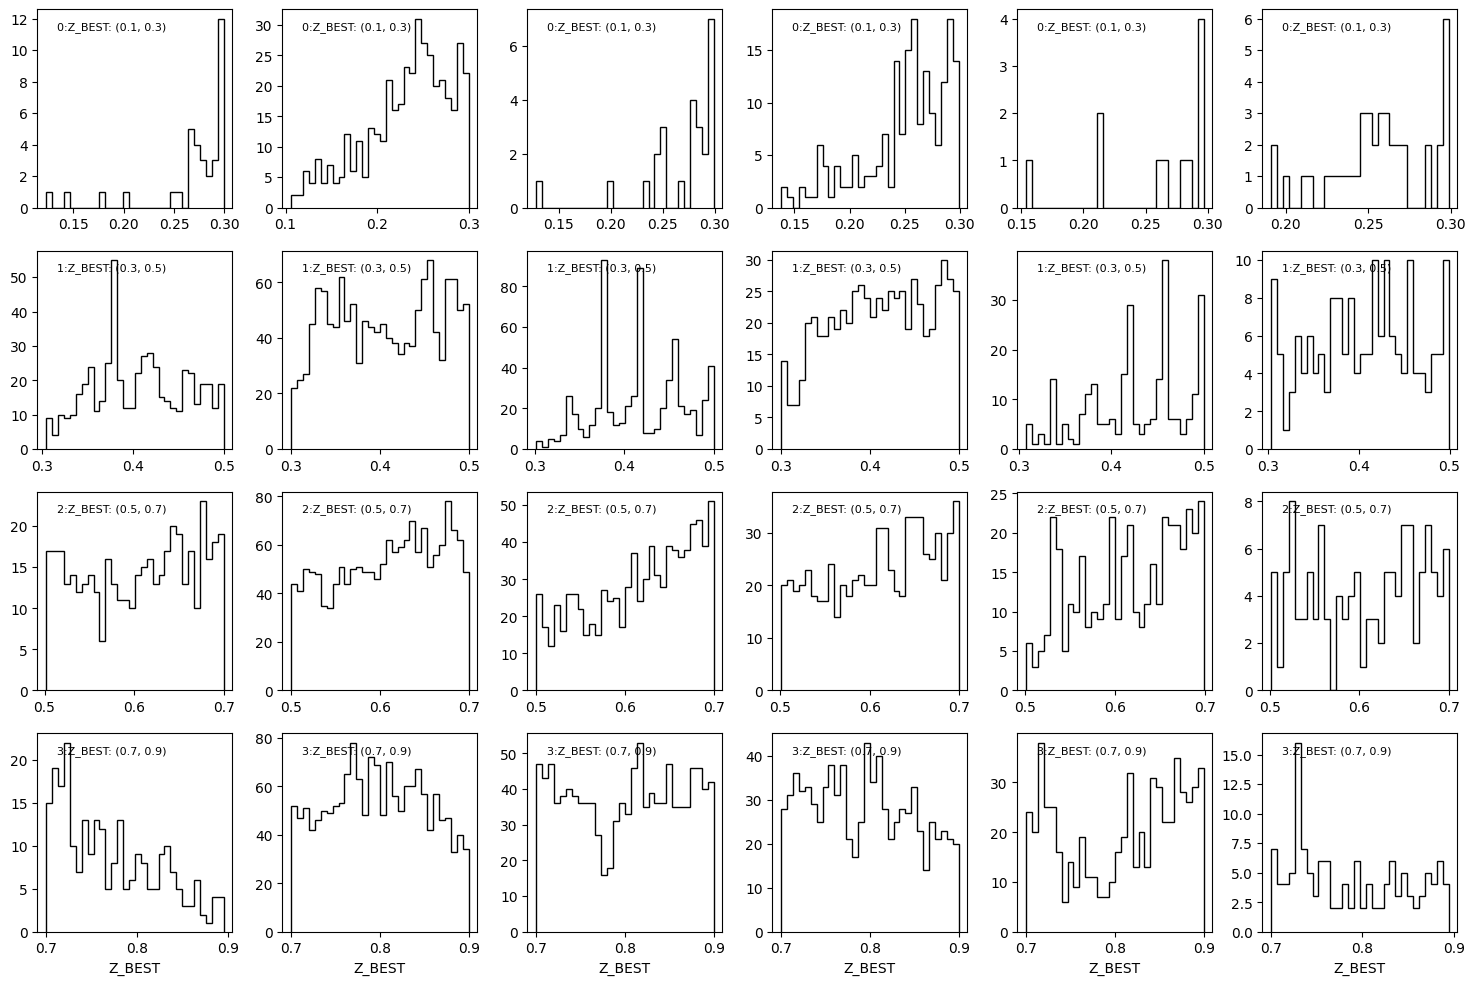

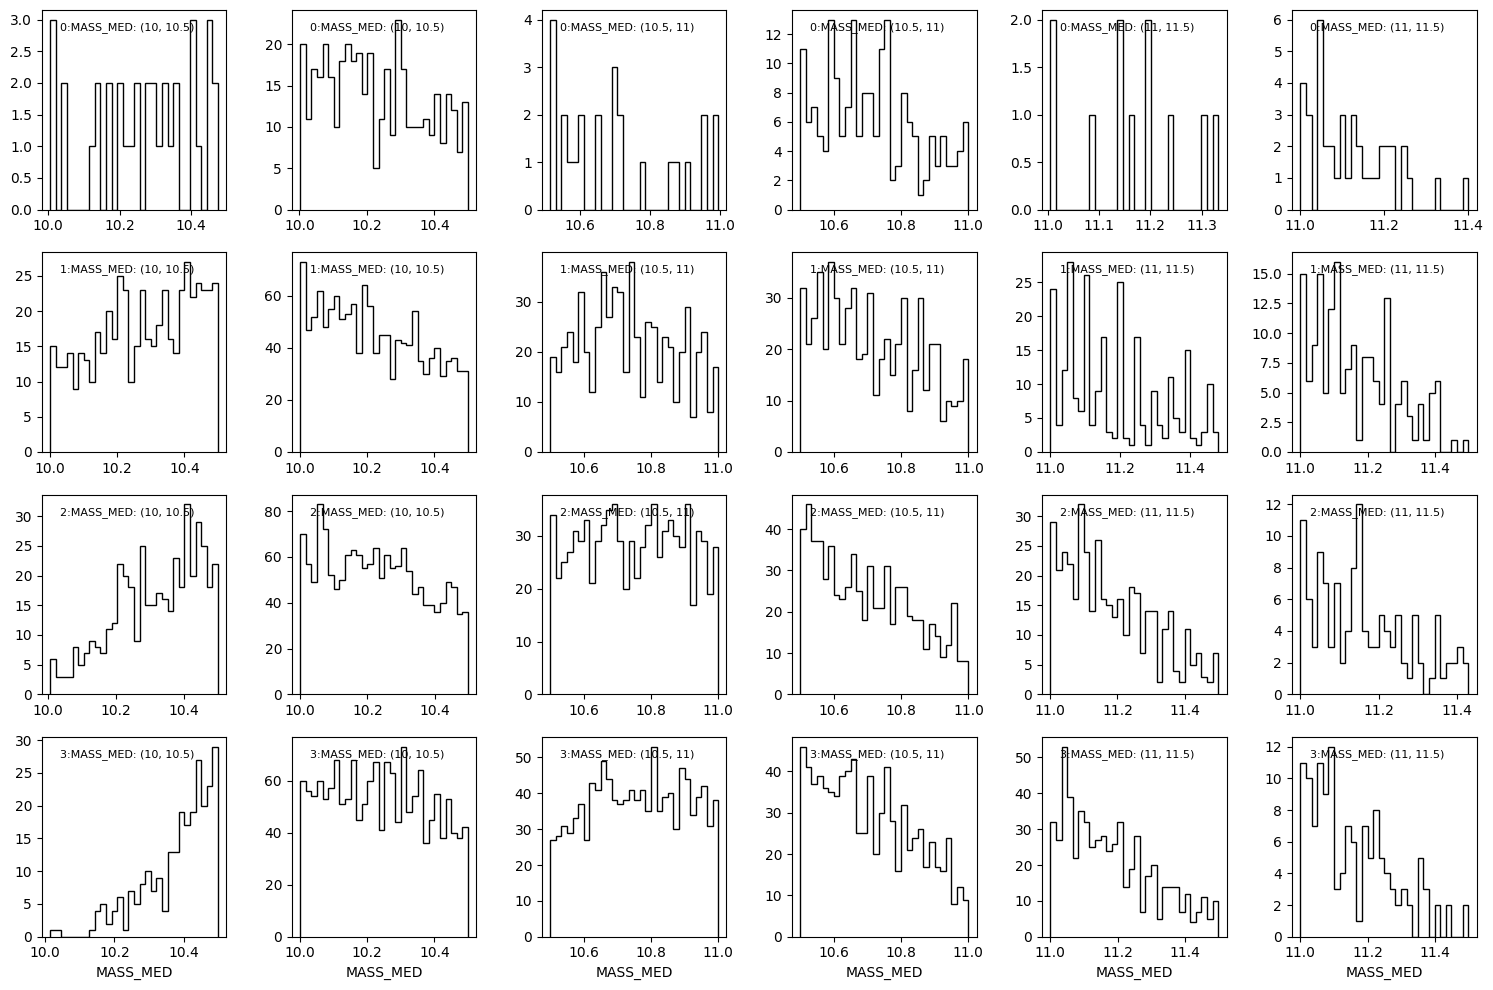

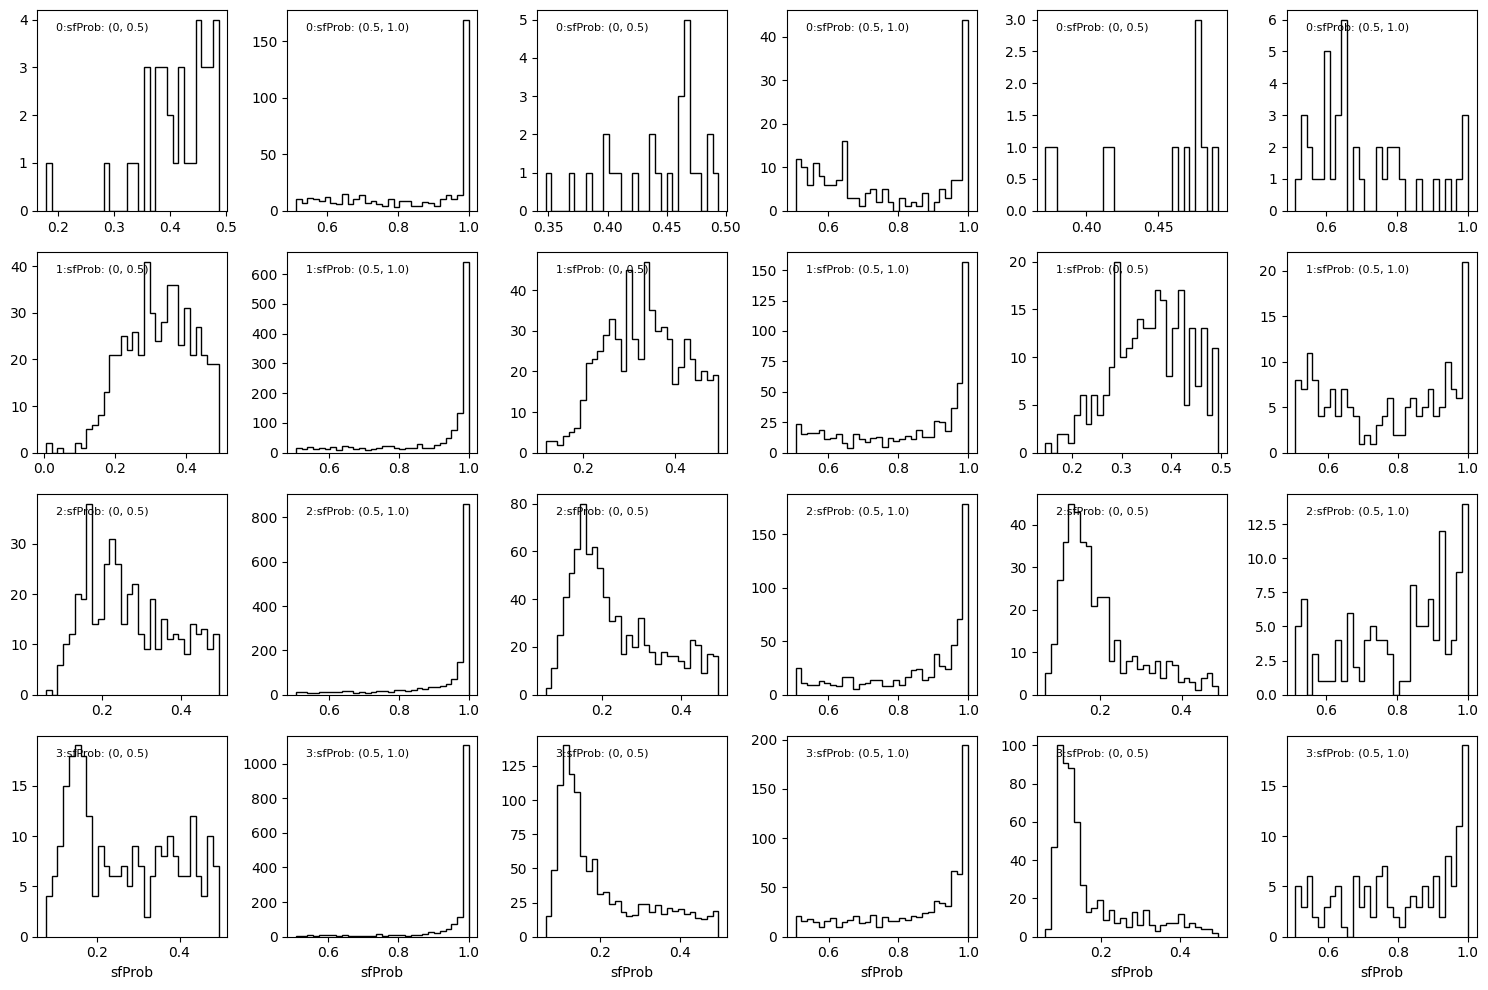

In [5]:

for key in binned.binning_info.keys():
    galprime.plotting.plot_binlist(binned, key=key)
# plot_binlist(binned, key="Z_BEST")